In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from labellines import labelLines
from tqdm import tqdm
import datetime

In [2]:
def PlotAngles(angle1, angle2, predicted_angle2):
    plt.figure(figsize = (6, 6))
    plt.plot(0, 0, color='blue', marker = 'o')
    r = 1.5
    angles = np.linspace(0*np.pi, 2*np.pi, 100)
    xs, ys = np.cos(angles), np.sin(angles)
    plt.plot(xs, ys, color = 'green')
    plt.xlim(-r, r)
    plt.ylim(-r, r)
    plt.gca().set_aspect('equal')
    xvals = [np.cos(angle1 * np.pi / 180), np.cos(angle2 * np.pi / 180), np.cos(predicted_angle2 * np.pi / 180)]

    plt.plot([0, r * np.cos(angle1 * np.pi / 180)], [0, r * np.sin(angle1 * np.pi / 180)], color = "red", label="reference")
    plt.plot([0, r * np.cos(angle2 * np.pi / 180)], [0, r * np.sin(angle2 * np.pi / 180)], color = "black", label="observed")
    plt.plot([0, r * np.cos(predicted_angle2 * np.pi / 180)], [0, r * np.sin(predicted_angle2 * np.pi / 180)], color = "grey", label="predicted")

    lines = plt.gca().get_lines()
    labelLines(lines, align=True, xvals=xvals)
    plt.title(f"Maximum Error in Observation = {abs(angle2 - predicted_angle2):.2f}\u00B0")
    plt.axis("off")
    plt.show()


In [3]:
def PlotObservedLong(data):
    plt.figure(figsize = (6, 6))
    plt.plot(0, 0, color='blue', marker = 'o')
    r = 1.5
    angles = np.linspace(0*np.pi, 2*np.pi, 100)
    xs, ys = np.cos(angles), np.sin(angles)
    plt.plot(xs, ys, color = 'black')
    plt.xlim(-r, r)
    plt.ylim(-r, r)
    plt.gca().set_aspect('equal')
    xvals = []
    colours = ["red", "blue", "green", "orange", "cyan", "purple", "pink", "violet", "yellow", "crimson", "plum", "brown"]
    for index, row in data.iterrows():
        longitude = row["ZodiacIndex"]*30 + row["Degree"] + row["Minute.1"] / 60.0 + row["Second"] / 3600.0
        plt.plot([0, r * np.cos(longitude * np.pi / 180)], [0, r * np.sin(longitude * np.pi / 180)], color = colours[index], label=index+1)
        xvals.append(np.cos(longitude * np.pi / 180))
    lines = plt.gca().get_lines()
    labelLines(lines, align=True, xvals=xvals)
    plt.title("All observed longitudes")
    plt.axis("off")
    plt.show()    

In [2]:
data = pd.read_csv("data_mars_opposition_updated.csv")
print(f"data has {data.shape[0]} rows, {data.shape[1]} columns")
print(f"The keys are : {data.keys()}")

data has 12 rows, 15 columns
The keys are : Index(['Year', 'Month', 'Day', 'Hour', 'Minute', 'ZodiacIndex', 'Degree',
       'Minute.1', 'Second', 'LatDegree', 'LatMinute', 'ZodiacIndexAverageSun',
       'DegreeMean', 'MinuteMean', 'SecondMean'],
      dtype='object')


Consider Circle with Sun as Centre
---

C:\Users\Arnab\AppData\Roaming\Python\Python312\site-packages\labellines\core.py:151: UserWarning: Tried to label line Line2D(_child0), but could not find a label for it.
  warnings.warn(
C:\Users\Arnab\AppData\Roaming\Python\Python312\site-packages\labellines\core.py:151: UserWarning: Tried to label line Line2D(_child1), but could not find a label for it.
  warnings.warn(


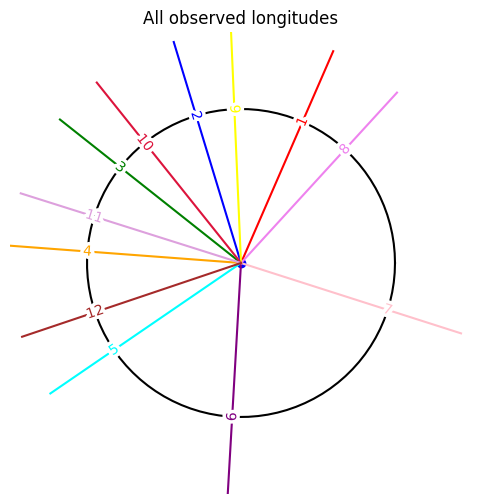

In [5]:
PlotObservedLong(data)

Finding out **orbit period** of Mars using Longitude

In [3]:
time = ["Year", "Month", "Day", "Hour", "Minute"]
orbitList = []
for index, row in data.iterrows():
    timeNow = row[time]
    angleNow = row["ZodiacIndex"]*30 + row["Degree"] + row["Minute.1"] / 60.0 + row["Second"] / 3600.0
    yearNow, monthNow, dayNow, hourNow, minuteNow = tuple(timeNow)

    for i in range(index+1, len(data)):
        thisRow = data.iloc[i]
        otherTime = thisRow[time]
        otherAngle = thisRow["ZodiacIndex"]*30 + thisRow["Degree"] + thisRow["Minute.1"] / 60.0 + thisRow["Second"] / 3600.0

        yearOth, monthOth, dayOth, hourOth, minuteOth = tuple(otherTime)
        a = datetime.datetime(yearNow, monthNow, dayNow, hourNow, minuteNow)
        b = datetime.datetime(yearOth, monthOth, dayOth, hourOth, minuteOth)

        angleDiff = (otherAngle - angleNow)%360 + 360 * (i - index)
        timeDiff = (b - a).total_seconds() / 60

        period_in_minutes = (timeDiff / angleDiff) * 360
        period_in_days = period_in_minutes / (24.0 * 60)
        orbitList.append(period_in_days)
orbitList = np.array(orbitList)

In [7]:
print(f"minimum orbit time {np.min(orbitList)}")
print(f"maximum orbit time {np.max(orbitList)}")
print(f"Average orbit time {np.mean(orbitList)}")
print(f"Median orbit time {np.median(orbitList)}")

minimum orbit time 669.0070026403398
maximum orbit time 773.1274962774286
Average orbit time 699.8652171252759
Median orbit time 690.4253045821195


Finding out Period of mars using Latitude

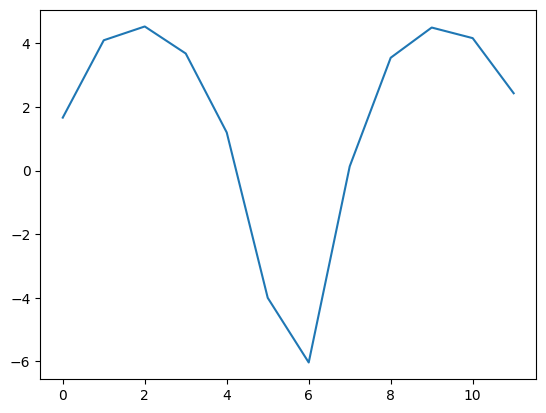

In [8]:
lat = np.array(data["LatDegree"]) + np.array(data["LatMinute"]) / 60.0
plt.plot(lat)
plt.show()

In [9]:
diff = np.zeros((12, 12), dtype = float)
for i in range(12):
    for j in range(12):
        diff[i][j] = abs(lat[i] - lat[j])
    diff[i][i] = np.infty
index = ind = np.unravel_index(np.argmin(diff, axis=None), diff.shape)
print(index)

(2, 9)


In [10]:
# print(lat[3], lat[8])
year1, month1, day1, hour1, minute1 = tuple(data[time].iloc[3])
year2, month2, day2, hour2, minute2 = tuple(data[time].iloc[8])
time1 = datetime.datetime(year1, month1, day1, hour1, minute1)
time2 = datetime.datetime(year2, month2, day2, hour2, minute2)
timeDiff = (time2 - time1).total_seconds()
print(f"Orbit time of mars = {timeDiff / (365 * 24 * 60)} days")

Orbit time of mars = 646.9065068493151 days


Assuming period of revolution of mars = 687 days

That is, 360 degrees per 687 days

In [11]:
oppositions = data[time]
angularVel = 360.0 / (687.0 * 24.0 * 60.0)  #Degrees per Minutes
allErrors = []
for index, row in data.iterrows():

    timeNow = row[time]
    angleNow = row["ZodiacIndex"]*30 + row["Degree"] + row["Minute.1"] / 60.0 + row["Second"] / 3600.0
    yearNow, monthNow, dayNow, hourNow, minuteNow = tuple(timeNow)

    error = [] 
    for i, thisRow in data.iterrows():
        otherTime = thisRow[time]
        otherAngle = thisRow["ZodiacIndex"]*30 + thisRow["Degree"] + thisRow["Minute.1"] / 60.0 + thisRow["Second"] / 3600.0

        yearOth, monthOth, dayOth, hourOth, minuteOth = tuple(otherTime)
        a = datetime.datetime(yearNow, monthNow, dayNow, hourNow, minuteNow)
        b = datetime.datetime(yearOth, monthOth, dayOth, hourOth, minuteOth)
        timeDiff = (b - a).total_seconds() / 60
        
        predictedAngle = (angleNow + timeDiff * angularVel) % 360
        angleError = predictedAngle - otherAngle
        error.append(angleError)
        # print(f"Error in Angles = {angleError} degrees")
        
    allErrors.append(error)
allErrors = np.array(allErrors, dtype = float)

In [12]:
index = ind = np.unravel_index(np.argmax(allErrors, axis=None), allErrors.shape)
print(index)
y, x = index
time1 = data[time].iloc[x]
y1, M1, d1, h1, m1 = tuple(time1)
time1 = datetime.datetime(y1, M1, d1, h1, m1)
angle1 = data.iloc[x]

time2 = data[time].iloc[y]
y2, M2, d2, h2, m2 = tuple(time2)
time2 = datetime.datetime(y2, M2, d2, h2, m2)
angle2 = data.iloc[y]

longitude1 = angle1["ZodiacIndex"]*30 + angle1["Degree"] + angle1["Minute.1"] / 60.0 + angle1["Second"] / 3600.0
longitude2 = angle2["ZodiacIndex"]*30 + angle2["Degree"] + angle2["Minute.1"] / 60.0 + angle2["Second"] / 3600.0

#With respect to [4] we predict [7]

timeDiff = (time2 - time1).total_seconds() / 60
predictedAngle = (longitude1 + angularVel * timeDiff) % 360

(0, 4)


C:\Users\Arnab\AppData\Roaming\Python\Python312\site-packages\labellines\core.py:151: UserWarning: Tried to label line Line2D(_child0), but could not find a label for it.
  warnings.warn(
C:\Users\Arnab\AppData\Roaming\Python\Python312\site-packages\labellines\core.py:151: UserWarning: Tried to label line Line2D(_child1), but could not find a label for it.
  warnings.warn(


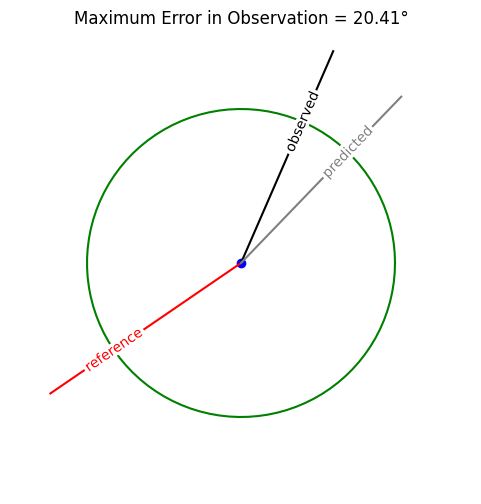

In [13]:
PlotAngles(angle1=longitude1, angle2=longitude2, predicted_angle2=predictedAngle)

Consider Circle with arbitrary centre (equant)
---

In [3]:
def get_intersection(longitude_degrees, r, e1, e2):

    e2 = np.deg2rad(e2)
    alpha = np.deg2rad(longitude_degrees)
    sec_alpha = 1.0 / np.cos(alpha)
    tan_alpha = np.tan(alpha)
    sin_e2, cos_e2 = np.sin(e2), np.cos(e2)

    a = sec_alpha**2
    b = -2 * e1 * (cos_e2 + tan_alpha * sin_e2)
    D_square = 4 * (e1**2) * (cos_e2 + tan_alpha * sin_e2)**2 - 4 * (sec_alpha**2) * (e1**2 - r**2)
    if(D_square <= 0):
        return None
    D = np.sqrt(D_square)

    if(alpha >= 0 and alpha <= np.pi / 2.0) or (alpha >= np.pi * 1.5 and alpha <= 2*np.pi):
        x = (-b + D) / (2 * a)
    else:
        x = (-b - D) / (2 * a)
    y = x * tan_alpha

    mars_pos = (x, y)

    return mars_pos

In [6]:
time = ["Year", "Month", "Day", "Hour", "Minute"]
angularVel = 360.0 / (687.0 * 24.0 * 60.0)
times = []
for _, row in data.iterrows():
    year, month, day, hour, minute = tuple(row[time])
    t = datetime.datetime(year, month, day, hour, minute)
    times.append(t)
ground_truth_longitudes = np.array(data["ZodiacIndex"]) * 30 + np.array(data["Degree"]) + np.array(data["Minute.1"]) / 60.0 + np.array(data["Second"]) / 3600.0


100%|██████████| 10/10 [00:12<00:00,  1.22s/it]


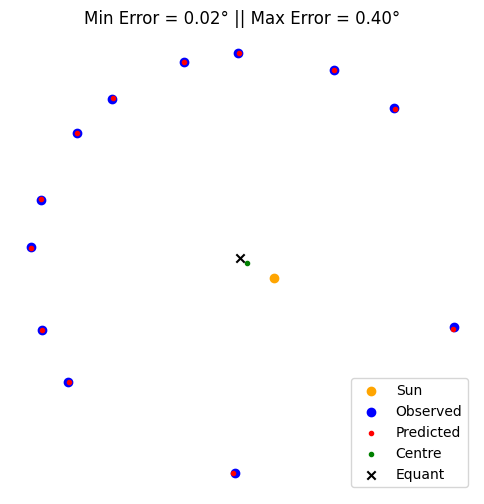

100%|██████████| 10/10 [00:12<00:00,  1.24s/it]


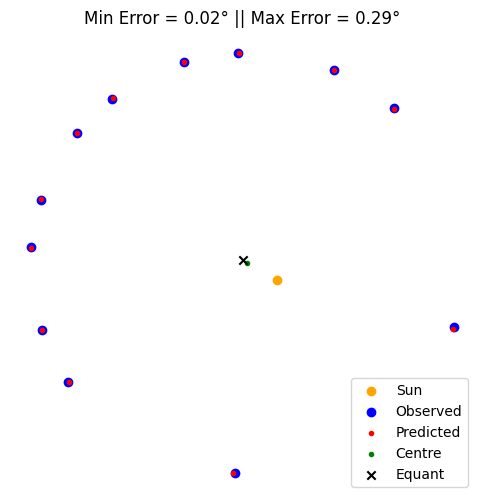

100%|██████████| 10/10 [00:16<00:00,  1.62s/it]


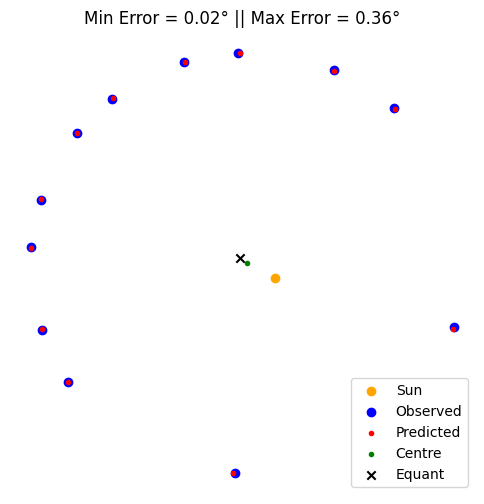

100%|██████████| 10/10 [00:19<00:00,  1.92s/it]


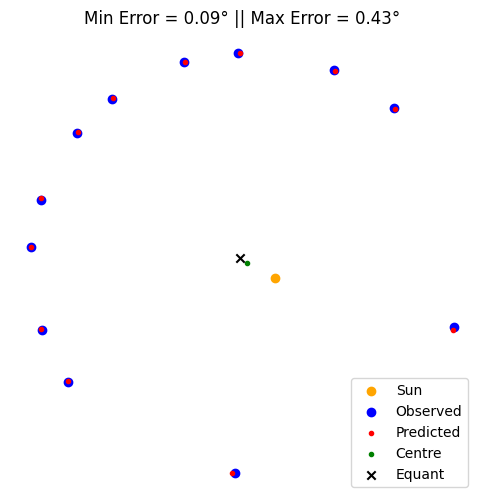

100%|██████████| 10/10 [00:16<00:00,  1.67s/it]


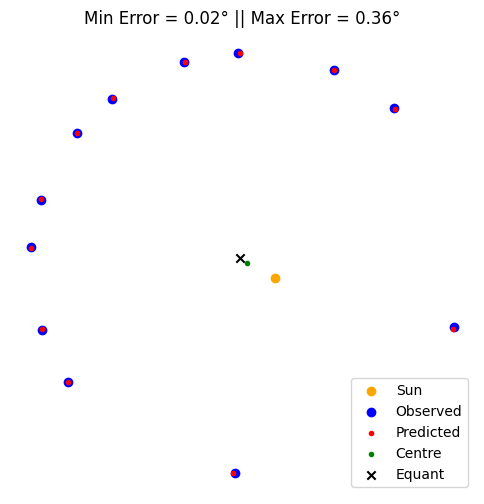

100%|██████████| 10/10 [00:16<00:00,  1.63s/it]


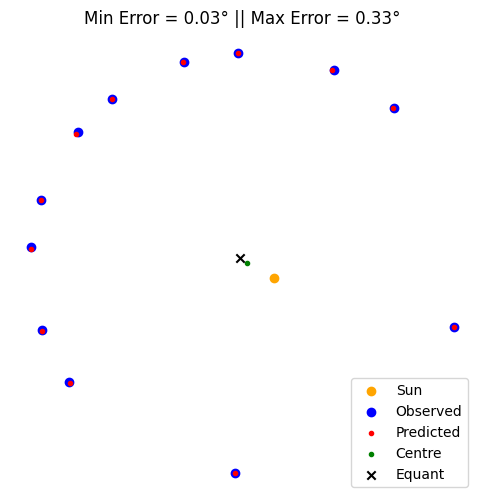

100%|██████████| 10/10 [00:16<00:00,  1.63s/it]


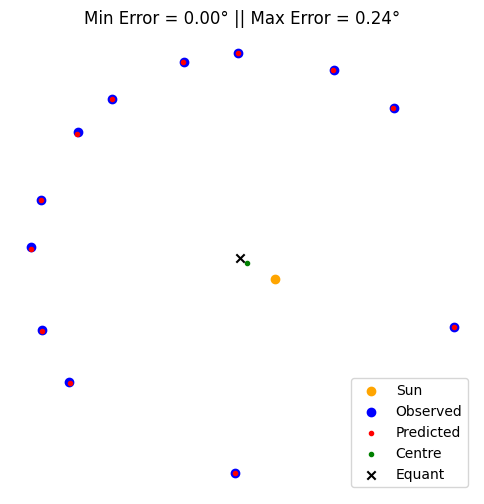

100%|██████████| 10/10 [00:15<00:00,  1.57s/it]


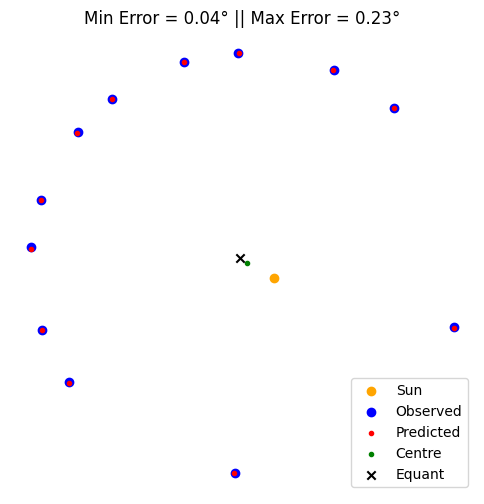

100%|██████████| 10/10 [00:16<00:00,  1.68s/it]


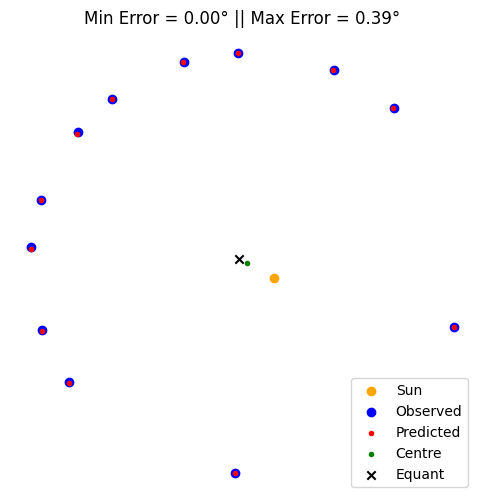

100%|██████████| 10/10 [00:14<00:00,  1.48s/it]


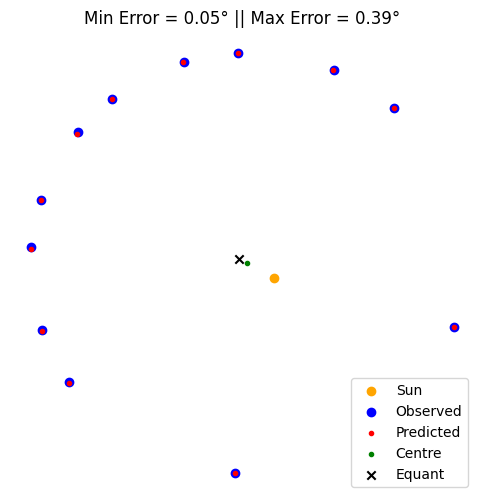

100%|██████████| 10/10 [00:15<00:00,  1.50s/it]


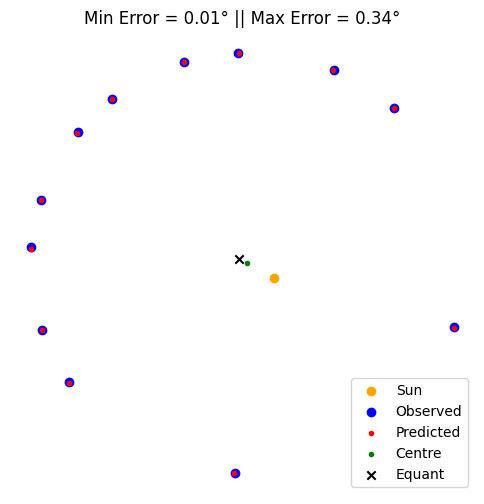

100%|██████████| 10/10 [00:14<00:00,  1.50s/it]


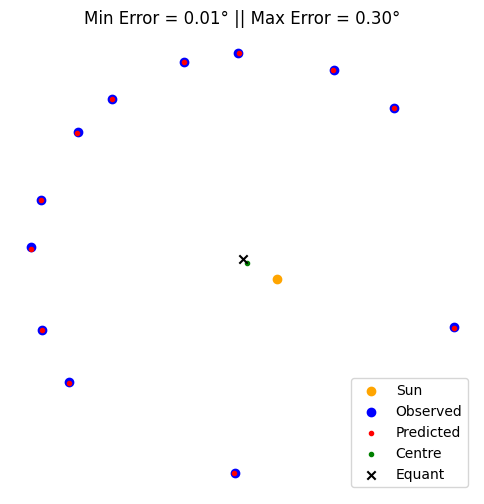

In [7]:
for index in range(12):
    ref_longitude = ground_truth_longitudes[index] # degrees
    ref_time = times[index]


    range_of_e2 = np.linspace(start=149, stop=150, num=10)
    range_of_c = np.linspace(start=150, stop=151, num=10)

    predicted_longitudes = []
    minofmax_error = np.inf
    range_of_e1 = np.linspace(start=1.0, stop=1.3, num=10)
    for e1 in tqdm(range_of_e1):
        range_of_radii = np.linspace(start=5.3, stop=5.4, num=10) * e1
        for e2 in range_of_e2:
            for c in range_of_c:
                # c = e2
                for r in range_of_radii:
                    gt = get_intersection(longitude_degrees=ref_longitude, r=r, e1=1, e2=c)
                    r_x, r_y = gt
                    predicted_longitudes = []
                    times_list = []
                    for i in range(12):
                        
                        observed_longitude = ground_truth_longitudes[i]
                        obs_time = times[i]
                        timeDiff = (obs_time - ref_time).total_seconds() / 60.0 
                        times_list.append(timeDiff)

                        a, b = r_x - e1 * np.cos(np.deg2rad(e2)), r_y - e1 * np.sin(np.deg2rad(e2))
                        theta = np.arctan(b / a)
                        if(a >= 0 and b <= 0):
                            theta = theta + 2 * np.pi
                        elif(a <= 0 and b >= 0):
                            theta += np.pi
                        elif(a <= 0 and b <= 0):
                            theta += np.pi

                        alpha = (np.rad2deg(theta) + angularVel * timeDiff) % 360   #alpha in degrees
                        a, b = np.cos(np.deg2rad(c)) - e1 * np.cos(np.deg2rad(e2)), np.sin(np.deg2rad(c)) - e1 * np.sin(np.deg2rad(e2))
                        d = np.sqrt(a**2 + b**2)
                        if(a == 0):
                            temp_e2 = 0.5 * np.pi * np.sign(b)
                        else:
                            temp_e2 = np.arctan(b / a)      #temp_e2 in radians

                        if(a >= 0 and b <= 0):
                            temp_e2 += 2 * np.pi
                        elif(a <= 0 and b >= 0):
                            temp_e2 += np.pi
                        elif(a <= 0 and b <= 0):
                            temp_e2 += np.pi

                        x_cap, y_cap = get_intersection(longitude_degrees=alpha, r = r, e1=d, e2=np.rad2deg(temp_e2)%360)
                        x, y = x_cap + e1 * np.cos(np.deg2rad(e2)), y_cap + e1 * np.sin(np.deg2rad(e2))
                        predicted_longitude = np.arctan(y / x)
                        if(x >= 0 and y <= 0):
                            predicted_longitude += 2 * np.pi
                        elif(x <= 0 and y >= 0) or (x <= 0 and y <= 0):
                            predicted_longitude += np.pi
                        predicted_longitude = np.rad2deg(predicted_longitude)
                        predicted_longitudes.append(predicted_longitude)
                                    
                    predicted_longitudes = np.array(predicted_longitudes) % 360
                    error = np.abs(predicted_longitudes - ground_truth_longitudes)
                    max_error = np.max(error % 360)
                    if(minofmax_error > max_error):
                        minofmax_error = max_error
                        best_r = r
                        best_c = c
                        best_e1 = e1
                        best_e2 = e2
                        best_predicted_long = predicted_longitudes
                        best_range_of_r = range_of_radii

    plt.figure(figsize=(6,6))
    plt.scatter(0, 0, marker='o', color="orange", label="Sun")
    centre_x, centre_y = np.cos(np.deg2rad(best_c)), np.sin(np.deg2rad(best_c))

    plt.scatter(best_r * np.cos(np.deg2rad(ground_truth_longitudes)) + centre_x, best_r * np.sin(np.deg2rad(ground_truth_longitudes)) + centre_y, marker='o', color="blue", label="Observed")
    plt.scatter(best_r * np.cos(np.deg2rad(predicted_longitudes)) + centre_x, best_r * np.sin(np.deg2rad(predicted_longitudes)) + centre_y, marker='.', color="red", label="Predicted")

    plt.scatter(centre_x, centre_y, marker='.', label="Centre", color="green")
    plt.scatter(best_e1 * np.cos(np.deg2rad(best_e2)), best_e1 * np.sin(np.deg2rad(best_e2)), marker='x', color="black", label="Equant")
    # plt.scatter(2 * best_e1 * np.cos(np.deg2rad(ground_truth_longitudes)), 2 * best_e1 * np.sin(np.deg2rad(ground_truth_longitudes)), marker = 'o', color="blue", label="Observed")
    # plt.scatter(2 * best_e1* np.cos(np.deg2rad(best_predicted_long)), 2 * best_e1 * np.sin(np.deg2rad(best_predicted_long)), marker='.', color="red", label="Predicted")
    min_error = np.sort(np.abs(predicted_longitudes-ground_truth_longitudes))[1]
    plt.title(f"Min Error = {min_error:.2f}\u00B0 || Max Error = {minofmax_error:.2f}\u00B0")
    plt.legend()
    plt.axis("off")
    plt.show()
    plt.close()

In [18]:
print(f"best e1 = {best_e1}")
print(f"best c = {best_c}")
print(f"best r = {best_r}")
print(f"best e2 = {best_e2}")
print(minofmax_error)

best e1 = 1.1666666666666667
best c = 150.33333333333334
best r = 6.287037037037038
best e2 = 149.22222222222223
0.2879818836060508
